O KNN é um algoritmo de ML para encontrar grupos de usuários semelhantes com base em classificações comuns de filmes e fazer previsões usando a classificação média dos principais vizinho mais próximos

# Importando as bibliotecas 

In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
sns.set(font_scale=1.5)

In [2]:
# fazendo importação dos dois arquivos do dataset
ratings = pd.read_csv('E:/tcc/movielens/ratings.csv', sep=',')
movies = pd.read_csv('E:/tcc/movielens/movies.csv', sep=',')

In [3]:
# função head trás os 5 primeiros registros do DataFrame (Estrutura de dados do Python)
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Fazendo merge dos DataFrames

In [5]:
# função merge, é como se fosse um join no SQL
df = pd.merge(ratings, movies, on='movieId')

In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [7]:
# função info trás informações básicas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753444 entries, 0 to 27753443
Data columns (total 6 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
title        object
genres       object
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ GB


# Criando gráfico sobre Notas

Text(0.5, 1.0, 'Quantidade de avaliação por nota')

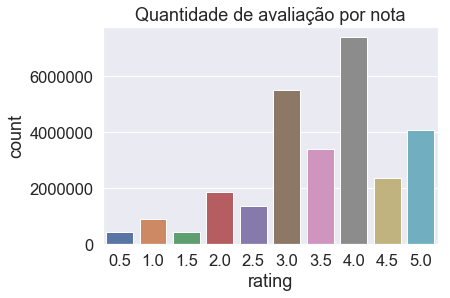

In [8]:
# plot de um gráfico verificando a distribuição das notas dadas aos filmes
ax = sns.countplot(df['rating'])
ax.set_title("Quantidade de avaliação por nota")
#plt.savefig('count-values-rating.png', dpi=300)

In [9]:
#df.rating.value_counts()

In [10]:
#função values_counts() verificando quantas vezes o filmes está no DataFrame, ou seja, a quantidade de avaliações que o 
# filme recebeu
total_ratings = df['movieId'].value_counts()
df = df.set_index('movieId')
df['total_ratings'] = total_ratings

In [11]:
#total_ratings

In [12]:
movies = movies.set_index('movieId')
movies['total_ratings'] = total_ratings

In [13]:
df = df.reset_index()

In [14]:
df.head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
0,307,1,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
1,307,6,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
2,307,56,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
3,307,71,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958
4,307,84,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,7958


In [16]:
# mostrando os 5 filmes mais avaliados
df.sort_values(by='total_ratings', ascending=False).head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
2013175,318,118214,4.0,948305097,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004965,318,94333,4.0,1075825476,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004956,318,94310,4.0,1535831009,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004957,318,94313,4.0,1002118866,"Shawshank Redemption, The (1994)",Crime|Drama,97999
2004958,318,94317,5.0,1386875907,"Shawshank Redemption, The (1994)",Crime|Drama,97999


# Limiar

In [17]:
# mediana da quantidade de avaliações dos filmes
mediana_total_ratings = df['total_ratings'].median()

In [18]:
mediana_total_ratings

10633.0

In [19]:
# média das avaliações
media_rating = df['rating'].mean()
media_rating

3.5304452124932677

In [20]:
# filtrando o dataframe para que tenha apenas filmes com a quantidade de avaliação acima da mediana
df = df.query('total_ratings >= @mediana_total_ratings')

In [21]:
# filtrando o dataframe para que tenha apenas filmes com a avaliação acima da média
df = df.query('rating >= @media_rating')

In [22]:
df = df.reset_index()
df = df.drop(columns=['index'])
df.head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
0,1221,3,4.0,945141407,"Godfather: Part II, The (1974)",Crime|Drama,38875
1,1221,15,4.0,1370809477,"Godfather: Part II, The (1974)",Crime|Drama,38875
2,1221,73,5.0,1437671653,"Godfather: Part II, The (1974)",Crime|Drama,38875
3,1221,88,5.0,1208454502,"Godfather: Part II, The (1974)",Crime|Drama,38875
4,1221,95,4.5,1086970047,"Godfather: Part II, The (1974)",Crime|Drama,38875


In [23]:
movies.sort_values('total_ratings', ascending=False).head()

,title,genres,total_ratings
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545.0


In [24]:
# média da nota por filme
nota_media = ratings.groupby('movieId').mean()['rating']

In [26]:
# criando coluna 'nota_media' no DataFrame movies
movies['nota_media'] = nota_media

# Recomendação COLD START

In [27]:
movies.query("total_ratings >= @mediana_total_ratings").sort_values('nota_media', ascending=False).head(10)

,title,genres,total_ratings,nota_media
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0,4.424188
858,"Godfather, The (1972)",Crime|Drama,60904.0,4.332893
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,62180.0,4.291959
1221,"Godfather: Part II, The (1974)",Crime|Drama,38875.0,4.263035
527,Schindler's List (1993),Drama|War,71516.0,4.257502
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,14578.0,4.254116
1203,12 Angry Men (1957),Drama,17931.0,4.237075
904,Rear Window (1954),Mystery|Thriller,22264.0,4.230799
2959,Fight Club (1999),Action|Crime|Drama|Thriller,65678.0,4.230663


In [28]:
movies.query("nota_media >= @media_rating").sort_values('total_ratings', ascending=False).head(10)

,title,genres,total_ratings,nota_media
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0,4.424188
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0,4.056585
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406.0,4.173971
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899.0,4.151412
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545.0,4.149695
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,81815.0,4.120455
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,76451.0,3.665034
527,Schindler's List (1993),Drama|War,71516.0,4.257502
110,Braveheart (1995),Action|Drama|War,68803.0,4.008481


# Próximos passos, split deve ser feito antes do pivot

In [29]:
# convertendo o tempo que veio do dataset para timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [30]:
df.head()

,movieId,userId,rating,timestamp,title,genres,total_ratings
0,1221,3,4.0,1999-12-14 03:16:47,"Godfather: Part II, The (1974)",Crime|Drama,38875
1,1221,15,4.0,2013-06-09 20:24:37,"Godfather: Part II, The (1974)",Crime|Drama,38875
2,1221,73,5.0,2015-07-23 17:14:13,"Godfather: Part II, The (1974)",Crime|Drama,38875
3,1221,88,5.0,2008-04-17 17:48:22,"Godfather: Part II, The (1974)",Crime|Drama,38875
4,1221,95,4.5,2004-06-11 16:07:27,"Godfather: Part II, The (1974)",Crime|Drama,38875


In [31]:
#df.timestamp.dt.year.value_counts()
#df.timestamp.dt.year.max()

In [32]:
# dividindo o dataset para treino em relação ao tempo
treino = df[(df.timestamp >= datetime.datetime(2005,1,1)) & (df.timestamp <= datetime.datetime(2011,12,31))]

In [33]:
# dividindo o dataset para teste em relação ao tempo
teste = df[(df.timestamp >= datetime.datetime(2012,1,1))]

In [34]:
# garantindo que apenas os mesmo usuários vão estar nos dois conjunto (treino e teste)
arr_userId_test = teste.userId.unique()
treino = treino[treino['userId'].isin(arr_userId_test)]
arr_userId_treino = treino.userId.unique()
teste = teste[teste['userId'].isin(arr_userId_treino)]

In [35]:
len(treino.userId.unique())

5104

In [36]:
len(teste.userId.unique())

5104

In [37]:
treino_pivot = treino.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

In [38]:
teste_pivot = teste.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

In [39]:
treino_matrix = csr_matrix(treino_pivot.values)

In [43]:
def recomendar_para_usuario(usuario_index):
    #Busca os k vizinhos mais próximos do usuário
    distancias, indices = modelo.kneighbors([treino_pivot.iloc[usuario_index]], n_neighbors=20)
    #usuario mais proximos
    usuario_vizinhos = teste_pivot.iloc[indices[0]]
    filmes = usuario_vizinhos.agg(np.mean).sort_values(ascending=False).head()
    filmes_recomendados = filmes.to_frame()
    filmes_recomendados.rename(columns={0: 'notas'}, inplace=True)
    filmes_recomendados = filmes_recomendados[filmes_recomendados.notas >= 3]
    return movies[movies.index.isin(filmes_recomendados.index)]
    
def treinamento(matrix):
    modelo = NearestNeighbors(n_neighbors=20, algorithm='brute', metric='cosine', n_jobs=-1)
    modelo.fit(matrix)
    return modelo

def notas_do_usuario(usuario):
    notas_do_usuario = teste.query("userId == %d" % usuario)
    notas_do_usuario = notas_do_usuario[["movieId", "rating"]].set_index("movieId")
    return notas_do_usuario

def validacao(usuario_index):
    distancias, indices = modelo.kneighbors([treino_pivot.iloc[usuario_index]])
    usuario_vizinhos = teste_pivot.iloc[indices[0]]
    return usuario_vizinhos.agg(np.mean).sort_values(ascending=False).head()

def filmes_que_acertou(index):
    filmes_que_usuario_viu_no_futuro = teste[teste['userId'] == treino_pivot.iloc[index].name]
    filmes_que_usuario_viu_no_futuro = filmes_que_usuario_viu_no_futuro.set_index('movieId')
    return filmes_que_usuario_viu_no_futuro[filmes_que_usuario_viu_no_futuro.index.isin(filmes_recomendados.index)]

def filmes_que_viu_no_futuro(index):
    return teste[teste['userId'] == treino_pivot.iloc[index].name]

def plot_graf_comparacao(array_real, array_previsao, df_plot):
    df_error = pd.DataFrame()
    df_error['Real'] = array_real
    df_error['Prevista'] = array_previsao
    
    df_error['movieId'] = df_plot.index
    df_error = df_error.set_index('movieId')
    df_error['titulo'] = df_plot['titulo']
    df_error = df_error.set_index('titulo')
    df_error.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title("Para k = 5")
    plt.ylabel('Nota')
    plt.tight_layout()
    plt.legend(loc=1)
    plt.savefig('plot-comparacaok5.png', dpi=300)
    
def plot_graf_metrics(rmse, mae):
    df_metrics = pd.DataFrame()
    df_metrics['RMSE'] = [rmse]
    df_metrics['MAE'] = [mae]
    df_metrics.plot(kind='bar')
    plt.title('RMSE x MAE')
    plt.ylabel('Valor')
    plt.savefig('plot-metricsk5.png', dpi=300)

def notas_previstas(index):
    notas_previstas = validacao(index)
    notas_previstas = notas_previstas.to_frame()
    notas_previstas.rename(columns={0: 'notas'}, inplace=True)
    notas_previstas = notas_previstas[notas_previstas.notas >= 3]
    notas_previstas = notas_previstas.reset_index()
    notas_previstas = notas_previstas.sort_values(by='movieId')
    return notas_previstas

def notas_reais():
    notas_reais = acertou['rating']
    notas_reais = notas_reais.to_frame()
    notas_reais = notas_reais.reset_index()
    notas_reais = notas_reais.sort_values(by='movieId')
    return notas_reais
    
def normalizar_prev_real(nota_prevista, nota_real):
    arr_movieId_previsao = nota_prevista.movieId.unique()
    nota_real = nota_real[nota_real['movieId'].isin(arr_movieId_previsao)]
    
    arr_movieId_reais = nota_real.movieId.unique()
    nota_prevista = nota_prevista[nota_prevista['movieId'].isin(arr_movieId_reais)]
    
    return nota_prevista, nota_real

In [44]:
# treinando o modelo
modelo = treinamento(treino_matrix)

In [130]:
# escolhendo usuário de forma aleatória
index = np.random.choice(treino_pivot.shape[0])

In [131]:
# chamando a função 'recomendar_para_usuario'
filmes_recomendados = recomendar_para_usuario(index)

In [132]:
# mostrando os filmes que o SR recomendou
filmes_recomendados

,title,genres,total_ratings,nota_media
movieId,,,,
89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,17700.0,3.799011
91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,19711.0,3.977855
104841,Gravity (2013),Action|Sci-Fi|IMAX,11982.0,3.632741
122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,12747.0,3.794736
134130,The Martian (2015),Adventure|Drama|Sci-Fi,16160.0,4.043812


In [133]:
#iloc pega pelo index (numero da linha) e loc pega por onde onde aquele valor x está
#id_usuario_recomendacao = treino_pivot.iloc[index].name

In [134]:
# verificando os filmes que o SR acertou em dizer que o usuário gostou
acertou = filmes_que_acertou(index)

In [135]:
acertou

,userId,rating,timestamp,title,genres,total_ratings
movieId,,,,,,
89745,94749,5.0,2012-05-14 21:13:11,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,17700
91529,94749,4.5,2012-12-18 01:55:30,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,19711
122886,94749,4.5,2016-02-02 20:46:43,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,12747
104841,94749,4.5,2013-11-12 04:53:10,Gravity (2013),Action|Sci-Fi|IMAX,11982


In [136]:
#filmes_que_viu_no_futuro(index)

In [138]:
# verificando as notas que o SR deu aos filmes
previsao = notas_previstas(index)

In [139]:
# Verificando as notas reais, ou seja, notas que de fato o usuário deu
#notas_reais_arr = acertou['rating']
real = notas_reais()

In [140]:
# essa função deixa apenas os filmes que estão nos dois DataFrame
pred, real = normalizar_prev_real(previsao, real)

In [141]:
Y_true = real['rating'].array

In [142]:
Y_pred = pred['notas'].array

In [143]:
from math import sqrt

In [144]:
# aplicando métrica RMSE
rmse = sqrt(mean_squared_error(Y_true, Y_pred))
rmse

1.2734058661715046

In [146]:
# aplicando métrica MAE
mae = mean_absolute_error(Y_true, Y_pred)
mae

1.2625000000000002

In [147]:
Y_true

<PandasArray>
[5.0, 4.5, 4.5, 4.5]
Length: 4, dtype: float64

In [148]:
Y_pred

<PandasArray>
[3.525, 3.4, 3.4, 3.125]
Length: 4, dtype: float64

In [149]:
df_para_plot = real
df_titulo = movies[movies.index.isin(real.movieId)]
df_para_plot = df_para_plot.set_index('movieId')
df_para_plot['titulo'] = df_titulo['title']

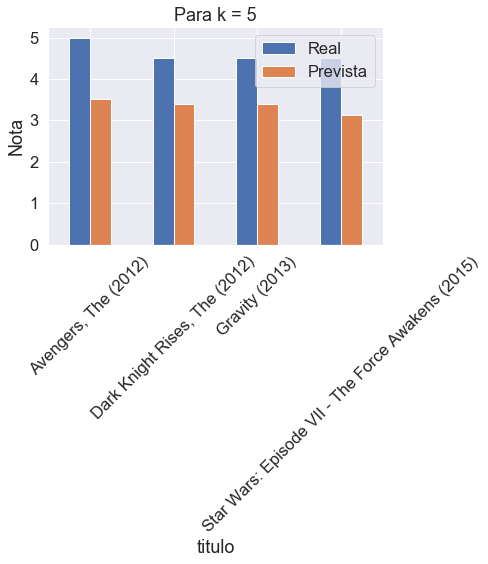

In [152]:
# plotando gráfico que compara as notas
plot_graf_comparacao(Y_true, Y_pred, df_para_plot)

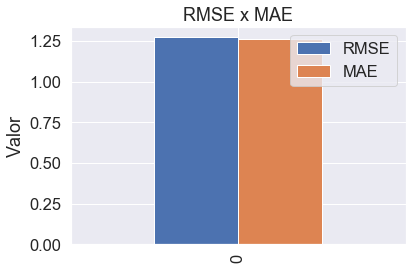

In [153]:
# plotando gráfico que compara as métricas RMSE x MAE
plot_graf_metrics(rmse, mae)